In [61]:
import os
import sys
from matplotlib import pyplot as plt
from PIL import Image
from skimage.io import imread, imshow, imsave
from skimage import img_as_float, img_as_ubyte
from numpy import roll, clip, round, dstack
import numpy as np
from skimage import color
import math
from matplotlib.pyplot import hist
import random

In [62]:
# зашумление «соль и перец»

In [63]:
def entropy2(one, two):
    sum_one = 0
    sum_two = 0
    size = len(one)*len(one[0])
    for i in range(len(one)):
        for j in range(len(one[0])):
            #pi = math.fabs(one[i,j]-two[i,j])/size
            p1 = math.fabs(one[i,j]/size)
            p2 = math.fabs(two[i,j]/size)
            #res += pi* math.log2(pi)
            sum_one += p1* math.log2(p1)
            sum_two += p2* math.log2(p2)
    print(sum_one, sum_two)
    return math.fabs(sum_one - sum_two)
def entropy4(one,two):
    res1 = 0 
    res2 = 0
    size = one.shape[0]*one.shape[1]
    values1, bin_edges1, patches1 = hist(one.ravel(), bins=range(257))
    values2, bin_edges2, patches2 = hist(two.ravel(), bins=range(257))
    for i in range(len(values1)):
        p1 = math.fabs(values1[i]/size)
        p2 = math.fabs(values2[i]/size)
        #print(p1, p2)
        if (p1>0):
            res1 += p1* math.log2(p1)
        if (p2>0):
            res2 += p2* math.log2(p2)
    print(res1, res2)
    return math.fabs(res1-res2)
def msi(one, two):
    e = 0
    for i in range(len(one)):
        for j in range(len(one[0])):
            e += round(one[i][j] - two[i][j])**2
    e = (e / (one.shape[0]*one.shape[1] - 1))**(1/2)
    return e

In [64]:
def splice(img1, img2):
    y = min(img1.shape[1],img2.shape[1])
    x = img1.shape[0]/2+img2.shape[0]/2
    x1 = img1.shape[0]/2
    new_img = np.zeros((x, y))
    new_img = img1
    new_img[x/2:x, 0:y] = img2[img2.shape[0]/2:img2.shape[0], 0:y]
    return new_img
def splice2(img1, img2):
    y = min(img1.shape[1],img2.shape[1])
    x = img1.shape[0]/2+img2.shape[0]/2
    x1 = img1.shape[0]/2
    new_img = np.zeros((x, y))
    new_img = np.copy(img1)
    new_img[0:x, y/2:y] = np.copy(img2[0:x, y/2:y])
    return new_img

In [65]:
def yuvToRGB(y, u, v):
    rd = y[:,:] + 1.402*(v[:,:] - 128)
    gr = y[:,:] - 0.34414*(u[:,:] - 128) - 0.71414*(v[:,:] - 128)
    bl = y[:,:] + 1.772*(u[:,:] - 128)
    return rd, gr, bl
def make_u(rgb):
    return (-0.1687*rgb[:,:,0] - 0.3313*rgb[:,:,1] + 0.5*rgb[:,:,2] + 128)
def make_v(rgb):
    return (0.5*rgb[:,:,0] - 0.4187*rgb[:,:,1] - 0.0813*rgb[:,:,2] + 128)
def make_y(rgb):
    return (0.299*rgb[:,:,0] + 0.587*rgb[:,:,1] + 0.114*rgb[:,:,2])
def rgbToYUV(rgb):
    u = -0.1687*rgb[:,:,0] - 0.3313*rgb[:,:,1] + 0.5*rgb[:,:,2] + 128
    v = 0.5*rgb[:,:,0] - 0.4187*rgb[:,:,1] - 0.0813*rgb[:,:,2] + 128
    y = 0.299*rgb[:,:,0] + 0.587*rgb[:,:,1] + 0.114*rgb[:,:,2]
    return y, u, v

In [66]:
def TakeaList(llist):
    new_list = []
    for i in range(len(llist)):
        for j in range(len(llist[i])):
            new_list.append(llist[i][j])
    return new_list
def linearF(im, percent):
    y, u, v = rgbToYUV(im)
    
    y_s = y.copy().reshape(-1)
    y_s.sort()
    print(y_s)
    k = int(len(y_s)*percent/100)
    new_min = y_s[k]
    new_max = y_s[len(y_s) - k + 1]

    # for vituality dropped elements
    #lght_list = YnotZeroValuesList[0:k]
    #dark_list = YnotZeroValuesList[len(YnotZeroValuesList)-k:len(YnotZeroValuesList)]
    #print(lght_list, dark_list)
    
    new_y = (y[:,:] - new_min) *(255 / (new_max - new_min))
    rd = new_y[:,:] + 1.402*(v[:,:] - 128)
    gr = new_y[:,:] - 0.34414*(u[:,:] - 128) - 0.71414*(v[:,:] - 128)
    bl = new_y[:,:] + 1.772*(u[:,:] - 128)
    return clip(dstack((rd, gr, bl)),0,255).astype('uint8')

In [67]:
def SaltPepper(im, percent):
    new_im = np.copy(im)
    size = im.shape[0]* im.shape[1]
    one_elem = im[0,0]
    matrix = []
    #matrix = [np.array(([0,0,0])).astype('uint8'),
    #          np.array(([255,255,255])).astype('uint8')]
    for i in [0, 255]:
        new_one = []
        for j in range(len(one_elem)):
            new_one.append(i)
        matrix.append(np.array((new_one)).astype('uint8'))
    for i in range(len(matrix)):
        count_new_elems = int(size* percent/100)
        #print(count_new_elems, size)
        for j in range (count_new_elems):
            x = random.randint(0, im.shape[0]-1)
            y = random.randint(0, im.shape[1]-1)
            new_im[x,y] = matrix[i]
    return new_im

In [68]:
treeandcar = imread('lab2/treeandcar.jpg')
enjoy = imread('lab2/enjoy.jpg')

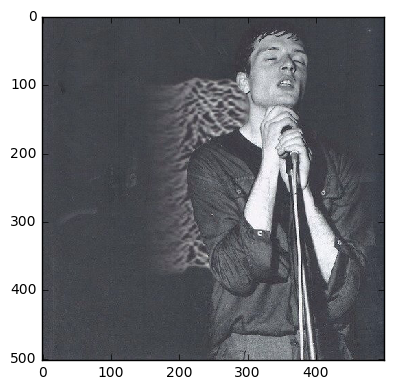

In [69]:
engoy = color.rgb2gray(enjoy)
imshow(enjoy)
plt.show()

[   5.157   15.923   18.673 ...,  255.     255.     255.   ]


/home/nikon-cook/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:13: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/nikon-cook/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:15: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


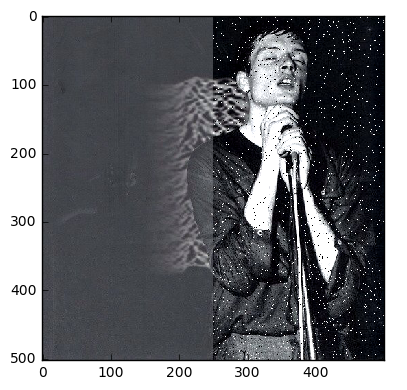

In [70]:
enjoy2 = linearF(enjoy,4)
imshow(enjoy2)
enjoy3 = SaltPepper(enjoy2,2)
spliced_enjoy3_sp = splice2(enjoy, enjoy3)
imshow(spliced_enjoy3_sp)
imsave('spliced_enjoy3_sp.jpg', spliced_enjoy3_sp)
difference_enjoy2and3 = np.abs(enjoy2 - enjoy3)
imsave('difference_enjoy2and3.jpg', difference_enjoy2and3)
plt.show()

In [71]:
enjoy3[0:5, 0:5]

array([[[  0,   0,   0],
        [ 23,  20,  27],
        [ 28,  25,  32],
        [ 33,  32,  38],
        [ 26,  25,  31]],

       [[ 28,  25,  32],
        [  0,   0,   0],
        [ 25,  22,  29],
        [ 28,  27,  33],
        [255, 255, 255]],

       [[ 25,  22,  29],
        [ 18,  15,  22],
        [ 21,  18,  25],
        [ 24,  23,  29],
        [ 17,  16,  22]],

       [[ 20,  17,  24],
        [ 16,  13,  20],
        [ 21,  18,  25],
        [ 24,  23,  29],
        [ 17,  16,  22]],

       [[ 18,  15,  22],
        [ 16,  13,  20],
        [ 25,  22,  29],
        [ 26,  25,  31],
        [ 21,  20,  26]]], dtype=uint8)

In [72]:
def avgBoxElem3(args):
    r_ar = []
    g_ar = []
    b_ar = []
    for i in range(len(args)):
        r_ar.append(args[i][0])
        g_ar.append(args[i][1])
        b_ar.append(args[i][2])
    r_ar.sort()
    g_ar.sort()
    b_ar.sort()
    return np.array([r_ar[len(r_ar)//2], g_ar[len(g_ar)//2], b_ar[len(b_ar)//2]], dtype='uint8')
def avgBoxElem(args):
    args.sort()
    return args[len(args)//2]
def MedianBox(parm):
    box = []
    if(parm.find('x')>0):
        size1 = int(parm[0:parm.index('x')])
        size2 = int(parm[parm.index('x')+1:])
        for i in range(0, size1):
            box.append([])
            for j in range(0, size2):
                box[len(box)-1].append([])
    if(parm.find('cross')>=0):
        size = int(parm[parm.find('cross')+len('cross'):])
        print(size%2)
        if(size%2==1):
            for i in range((size//2)+1):
                box.append([])
            for i in range(size):
                box[len(box)-1].append([])
            for i in range(size//2):
                box.append([])

    box[len(box)//2][len(box[len(box)//2])//2]=[0,0]
    for i in range(len(box)):
        if(i<len(box)//2):
            ordinatus = -(len(box)//2 - i)
        else: 
            ordinatus = i - len(box)//2
        if(len(box[i])>0):
            for j in range(len(box[i])):
                if(j<len(box[i])//2):
                    abscissa = -(len(box[i])//2 - j)
                else:
                    abscissa = j - len(box[i])//2
                box[i][j] = [ordinatus, abscissa]
        else:
            abscissa = 0
            box[i] = [ordinatus, abscissa]
    return box
def MedianFilter(img, parm):
    new_img = np.zeros((img.shape[0], img.shape[1]))
    y, u, v = rgbToYUV(img)
    arr = MedianBox(parm)
    for curr_row in range(img.shape[0]):
        for curr_col in range(img.shape[1]):
            args = []
            for i in range(len(arr)):
                if(len(arr[i])>2):
                    for j in range(len(arr[i])):
                        if(curr_row+i >= 0 and curr_row+i < img.shape[0]
                           and curr_col+j >= 0 and curr_col+j < img.shape[1]):
                            args.append(y[curr_row+i, curr_col+j])
            #print(args)
            #new_img[i, j] = np.array([clip((0,0,0), 0, 256)], dtype=np.uint8)
            #new_img[i, j] = avgBoxElem(args)
            if(i<5 and j<5):
                print(i,j)
            new_img[curr_row, curr_col] = 1
            
    return new_img
def MedianFilter1(img, parm):
    new_img = img.copy()
    arr = MedianBox(parm)
    for curr_row in range(img.shape[0]):
        for curr_col in range(img.shape[1]):
            args = []
            for i in range(len(arr)):
                if(len(arr[i])>2):
                    for j in range(len(arr[i])):
                        if(curr_row+i >= 0 and curr_row+i < img.shape[0]
                           and curr_col+j >= 0 and curr_col+j < img.shape[1]):
                            args.append(img[curr_row+i, curr_col+j])
            new_img[curr_row, curr_col] = avgBoxElem3(args)
    return new_img

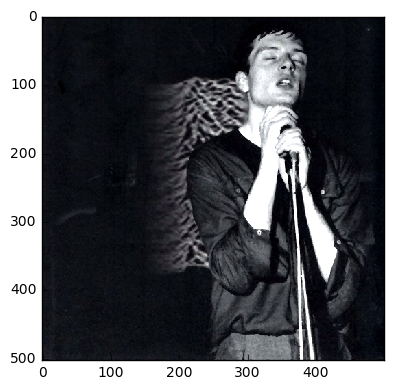

In [73]:
enjoy4 = MedianFilter1(enjoy3, '3x3')
imshow(enjoy4)
plt.show()

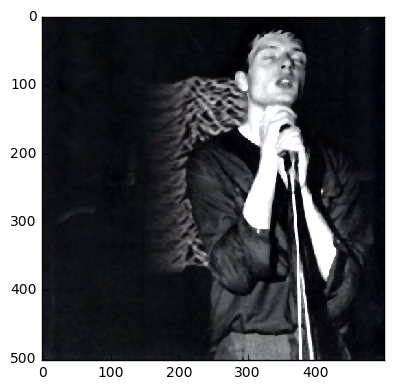

In [87]:
enjoy5 = MedianFilter1(enjoy3, '5x5')
imshow(enjoy5)
imsave('enjoy5.jpg', enjoy5)
plt.show()

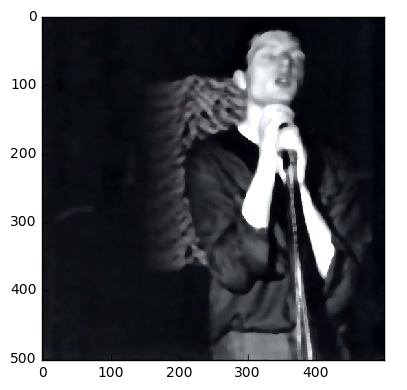

In [86]:
enjoy6 = MedianFilter1(enjoy3, '9x9')
imshow(enjoy6)
plt.show()

/home/nikon-cook/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:13: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/nikon-cook/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:15: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


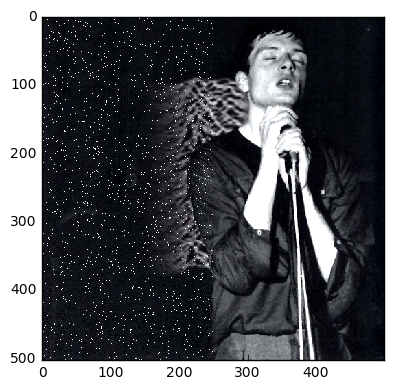

In [79]:
spliced_enjoy4_sp = splice2(enjoy3, enjoy4)
imshow(spliced_enjoy4_sp)
imsave('spliced_enjoy4_sp.jpg', spliced_enjoy4_sp)
difference_enjoy3and4 = np.abs(enjoy3 - enjoy4)
imsave('difference_enjoy3and4.jpg', difference_enjoy3and4)
plt.show()

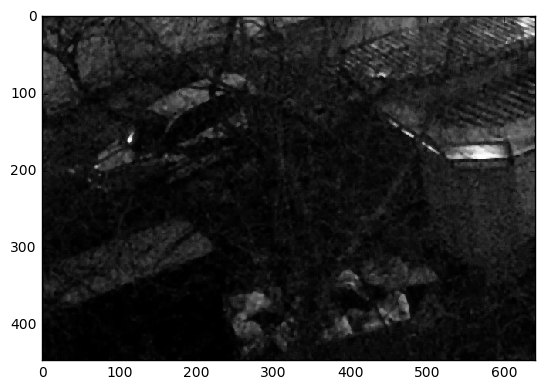

In [83]:
treeandcar3 = MedianFilter1(treeandcar, '3x3')
imshow(treeandcar2)
plt.show()

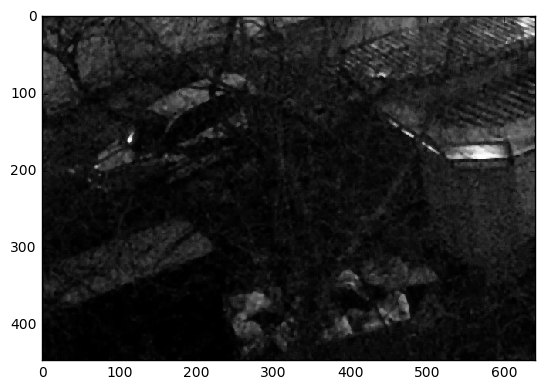

In [84]:
treeandcar2 = MedianFilter1(treeandcar, '5x5')
imshow(treeandcar2)
plt.show()

/home/nikon-cook/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:13: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/nikon-cook/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:15: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


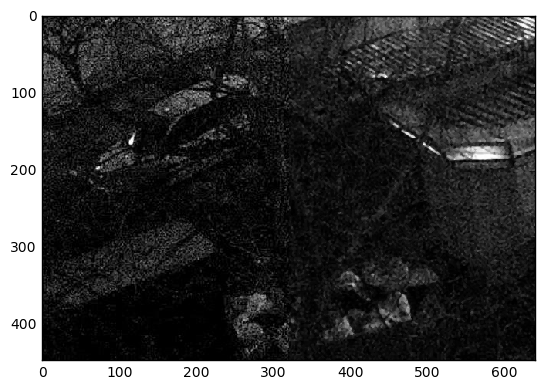

In [85]:
spliced_treeandcar_sp = splice2(treeandcar, treeandcar3)
imshow(spliced_treeandcar_sp)
imsave('spliced_treeandcar_sp.jpg', spliced_treeandcar_sp)
difference_treeandcar12 = np.abs(treeandcar - treeandcar2)
imsave('difference_treeandcar12.jpg', difference_treeandcar12)
plt.show()